### 3.1 决策树的构造

决策树

优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。

缺点：可能会产生过度匹配问题

适用数据类型：数值型和标称型



在构造决树时，我们需要解决的第一个问题就是，当前数据集上哪个特征在划分数据分类示起决定性作用。为了找到决定性的特征，划分出最好的结果，我们必须评估每个特征。完成测试之后，原始数据集就被划分为几个数据子集，这些数据子集会分布在第一个决策点的所有分支上。如果某个份之下的数据属于同一类型，则当前无需阅读的垃圾邮件已经正确的划分数据分类，无需进一步对数据集进行分割。如果数据子集内的数据不属于同一类型，则需要重复划分数据子集的过程。划分数据子集的算法和划分原始数据集的方法相同，直到所有的具有相同类型的数据均在一个数据子集内。



创建分支的伪代码函数createBranch() 如下所示：

检测数据集中的每个子项是否属于同一分类：

```
if so return 类标签
else
		寻找划分数据集的最好特征
		划分数据集
		创建分支节点
				for 每个划分的子集
						调用函数createBranch并增加返回结果到分支节点中
						
		return 分支节点
```

上面的伪代码createBranch 是一个递归函数，在倒数第二行直接调用了它自己。后面我们将把上面的伪代码直接转为python代码。这里我们需要进一步了解算法是如何划分数据集的。



决策树的一般流程

（1）收集数据：可以使用任何方法

（2）准备数据：构造算法只适用于标称型数据，因此数值型数据必须离散化。

（3）分析数据：可以使用任何方法，构造树完成之后，我们应该检查徒刑是否符合预期。

（4）训练算法：构造树的数据结构

（5）测试算法：使用经验树计算错误率

（6）使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好的理解数据的内在含义/


一些决策树算法采用二分法划分数据，本书并不采用这种方法。如果依据某个属性划分数据将会产生4个可能的值，我们将吧数据划分为四块。并创建四个不同的分支。本书将使用ID3算法划分数据集，该算法处理如何换份数据集，何时停止划分数据集。每次划分数据集时我们只选取一个特征属性，如果训练集中存在20个特征，第一次我们选择哪个特征作为划分的参考属性呢？

表3-1的数据包含5个海洋动物，特征包括：不浮出水面是否可以生存，以及是否有脚蹼。我们可以将这些动物分成两类：鱼类和非鱼类。现在我们想要决定依据第一个特征还是第二个特征划分数据。在回答这个问题之前，我们必须采用量化的方法判断如何划分数据。下一小节将详细讨论这个问题。
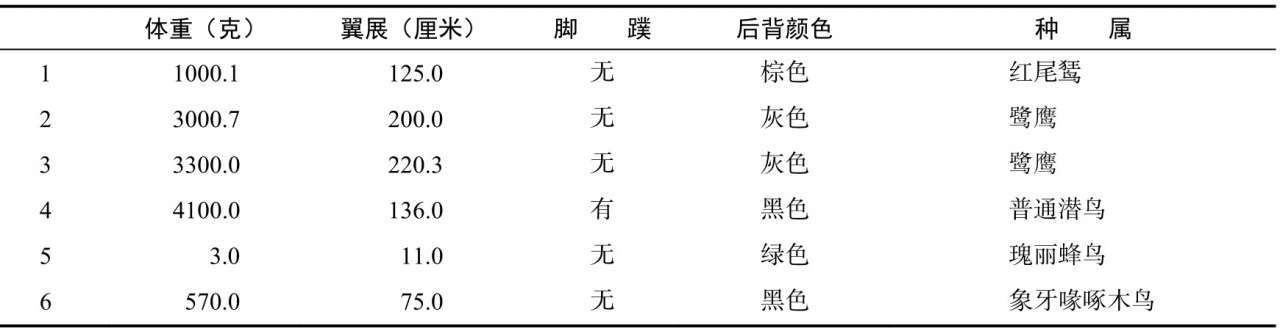

3.1.1 信息增益

划分数据集的大原则是：将无序的数据变得更加有序。我们可以使用多种方法划分数据集。但是每种方法都有各自的优缺点。组织杂乱无章数的一种方法就是使用信息论度量信息。信息论时量化处理信息的分支科学。我们可以在划分数据之前或者之后使用信息论量化度量信息的内容。



在划分数据集之前之后信息发生的变化称之为信息增益，知道如何计算信息增益，我们就可以计算每个特征值划分数据集获得的信息增益，获得信息增益最高特征的就是最好的选择。

在科研测评哪种数据划分方式是最好的数据划分之前，我们必须学习如何计算信息增益。集合信息的度量方式成为香农熵或者简称为熵，这个名字来源于信息论之父克劳德香农。

克劳德香农被公认为是二十世纪最聪明的人之一，威廉庞德斯通在其2005年出版的《财富公式》一书中是这样描写克劳德香农的：

“贝尔实验室和MIT有很多人将香农和爱因斯坦相提并论，而其他人则认为这种对比是不公平的——对香农是不公平的”

信息增益（information gain） 和熵（entrop）。

熵定义为信息的期望值。在明白这个概念之前，我们必须知道信息的定义。如果待分类的事务可能划分到多个分类之中，则符号$x_i$的信息定义为

$I（x_i）=-log_2 p(x_i)$ 

其中$p(x_i)$是选择该分类的概率。




为了计算熵，我们需要计算所有类比所有可能值包含的信息期望值，通过下面的公式得到：其中n是分类的数目 

 $H = -\sum_{i=1}^np(x_i)log_2p(x_i)$

下面我们将学习如何适使用python计算信息熵






$$程序清单3-1 计算给定数据集的香农熵$$

In [80]:
from importlib import reload
from importlib import reload
import importlib
import trees
from math import log

def calcShannonEnt(dataSet):
#     保存实例总数
    numEntries = len(dataSet)
#     创建一个数据字典
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
#         每个键值都记录了当前类别出现的次数
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

程序清单3-1的代码非常简单。首先，计算数据集中实例的总数。我们显示地生命一个变量 并保存实例总数。

然后创建一个数据字典，它的键值是最后一列的数值。如果当前键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。最后，使用所有类标签的发生频率计算类别出现的概率。我们将用这个概率计算香农熵。统计所有类标签发生的次数。下面我们看看如何使用熵划分数据集。

In [81]:
from importlib import reload
def createDataSet():
    dataSet = [[1,1,'yes'], 
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels


In [82]:
from importlib import reload
import importlib
import trees
importlib.reload(trees)
myDat,labels = createDataSet()


In [40]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [84]:
calcShannonEnt(myDat)

0.9709505944546686

In [85]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

熵越高，则混合的数据也就越多，我们可以在数据集中添加更多的分类，观察熵是如何变化的，这里我们增加第三个名为maybe的分类，测试熵的变化：



In [86]:
myDat[0][-1] ='maybe'

In [87]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [89]:
calcShannonEnt(myDat)

1.3709505944546687

得到熵之后，我们就可以按照获取最大信息增熵的方法划数据集，下一节我们将具体学习如何划分数据集以及如何度量信息增益。

另一个度量集合无序程度的方法是基尼不纯度（Gini ipurity），简单地说，就是从一个数据集中随机选取子项，度量其被错误地分类到其他分组的概率。本书不采用基尼不纯度方法，这里就不再做进一步介绍。下面我们将学习如何划分数据集。并创建决策树。
#### 3.1.2 划分数据集

上节我们学习了如何度量数据集的无序程度，分类算法除了需要测量信息熵，还需要划分数据集，度量划分数据集的熵，以便判断当前是否正确地划分了数据集。我们将每个特征划分数据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集是最好的划分方式。想象一个分布在二维空间的数据散点图，需要在数据之间划条线，将它们分成两部分，我们应该按照x轴还是y轴呢？答案就是本节讲述的内容。


$$程序清单3-2 按照给定特征划分数据集$$

In [2]:
# 使用了3个参数：待划分的数据集、划分数据集的特征、需要返回的特征的值

def splitDataSet(dataSet,axis,value):
    retDataSet = []
#     数据集这个列表中的各个元素也是列表，一旦发现符合要求的值，则将其添加到新创建的列表中。
#     在if语句中，程序将符合特征的数据抽取出来
    for featVec in dataSet:
        if featVec[axis]== value:
            reducedFeatvec = featVec[:axis]
            reducedFeatvec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatvec)
    return retDataSet

程序清单3-2的代码使用了三个参数：待划分的数据集、划分的数据集特征、需要返回的特征的值。需要注意的是，Python语言中不用考虑内存分配问题。python语言在函数中传递的是列表的引用，在函数内部对列表对象的修改，将会影响该列表对象的整个生存周期。为了消除这个不良影响，我们需要在函数的一开始声明一个新的对象。因为该函数代码在同一数据集上被调用多次，为了不修改原始数据集，创建一个新的列表对象。数据集这个列表中的各个元素也是列表，我们要遍历数据集中的每个元素，一旦发现符合要求的值，则将其添加到新创建的列表中。在if语句中，程序将符合特征的数抽取出来。后面讲述得更简单，这里我们可以这样理解这段代码：当我们按照某个特征划分数据集是，就需要将所有符合要求的元素抽取出来。代码中使用了Python语言列表类型自带的extend（）和append（）方法。·这两个方法类似，但处理的结果完全不同。



In [91]:
# 代码中使用了python的自带extend() 和append()方法。这两个方法的处理结果完全不同。
a = [1,2,3]
b = [4,5,6]
a.append(b)
a



[1, 2, 3, [4, 5, 6]]

In [92]:

a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [93]:
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

接下来我们将遍历整个数据集，循环计算香农熵和splitDataSet()函数，找到最好的特征划分方式。熵计算将会告诉我们如何划分数据集是最好的数据组织方式。


程序清单3-3选择最好的数据集划分方式

In [94]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
#     创建唯一的分类标签列表
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
#         计算每种划分方式的信息熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob* calcShannonEnt(subDataSet)
        infoGain = baseEntropy -newEntropy
#        计算最好的信息增益
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

函数chooseBestFeatureToSplit()实现选取特征，划分数据集，计算的出最好的划分数据集的特征。函数chooseBestFeatureToSplit()使用了程序清单3-1和程序清单3-2中的函数。在函数中调用的数据需要满足一定的要求：第一个要求是，数据必须是一种由列表元素组成的列表，而且所有的列表元素都要有相同的数据长度；第二个要求是，数据的最后一列或者每个实例的最后一个元素是当前实例的类别标签。数据一旦慢速上述要求，我们就可以在函数的第一行判定当前数据集包含多少特征属性。我们无需限定list中的数据类型。它们既可以是数字也可以是字符串，并不影响实际计算。

在开始划分数据集之前，程序清单3-3的第3行代码计算了整个数据集的原始香农熵，我们奥村最初的无序度量值，用户划分完之后的数据集计算的熵值进行比较。第1分for循环编织数据集中的所有特征。使用列表推导（List Comprehension）来创建新的列表，将数据集中所有的第i个特征值或者所有可能存在的值写入这个新list中，然后使用python原声集合set数据类型。集合数据类型与列表相似，不同之处在于集合类型中的每个值互不相同。从列表中创建集合是python语言得到列表中唯一元素值的最快方法。



遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，然后计算数据集的新熵值，并对所有唯一特征值得到的熵求和。信息增益是熵的减少或者是无序度的减少，大家肯定对于熵用于度量数据无序度的减少更容易理解。最后，比较所有的特征中的信息增益，返回最好特征划分的索引值。



现在我们可以测试上面代码的实际输出结果。



In [95]:
myDat ,labels = createDataSet()

In [96]:
chooseBestFeatureToSplit(myDat)

0

In [97]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

代码运行结果告诉我们，第0个特征是最好用的用于划分数据集的特征。结果是否正确呢？这个结果又有什么实际意义呢？数据集中的数据来源于表3-1，让我们回头再看一下表3-1或者变量myDat中的数据。如果我们按照第一个特征属性划分数据，也就是说第一个特征是1的放在一个组，第一个特征是0的放在另一个组，数据一致性如何？按照上述的方法划分数据集，第一个特征为1 的海洋生物分组将有两个属于鱼类，一个属于非鱼类；另一个分组则全部属于非鱼类。如果按照第二个特征分组，结果又是怎样呢？第一个海洋动物分组将有两个属于鱼类，两个属于非鱼类，另一个分组则有一个属于非鱼类。第一种划分很好地处理了相关数据。如果不相信目测结果，读者可以使用程序清单3-1的calcShannonEntropy（）函数测试不同特征分组的输出结果。

本节我们学习可如何度量数据集的信息熵，如何有效地划分数据集，下一节我们将介绍如何将这些函数功能放在一起，构建决策树。



#### 3.1.3 递归构建决策树

目前我们已经学习了从数据集构造决策树算法所需要的子功能模块，其工作原理如下：得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因袭可能存在大于两个分支的数据集划分。第一次划分之后，数据将被向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据。因此我们可以采用递归的原则处理数据集。

递归的结束条件是：程序便利完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果所有实例具有相同的分类，则得到一个叶子结点或者终止块。任何达到叶子结点的数据必然树属于叶子节点的分类，参见图3-2所示。

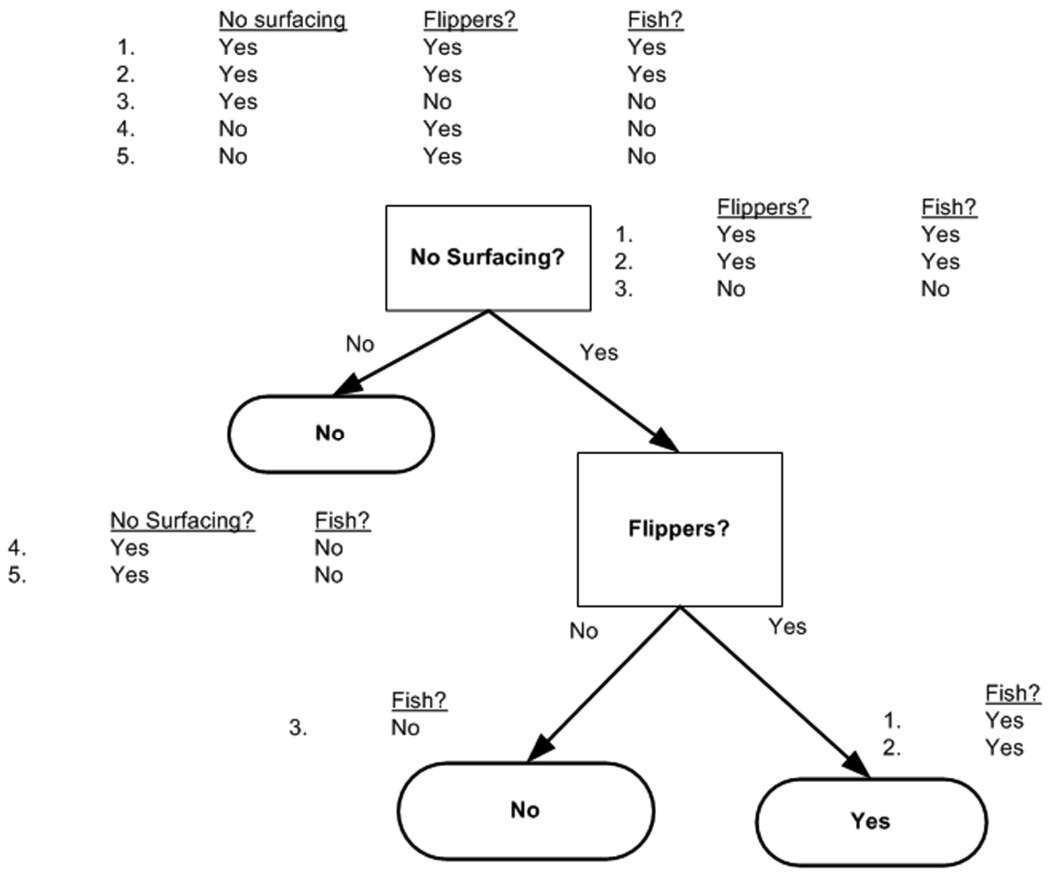

第一个结束条件使得算法可以终止，我们甚至可以设置算法可以划分的最大分组数目。后续章节还会介绍其他决策树算法，如C4.5和CART，这些算法在运行时并不总是在每次划分分组时都会消耗特征。由于特征数目并不是在每次划分数据分组时都减少，因此这些算法在实际使用时可能引起一定的问题。目前我们并不需要考虑这个问题，只需要在算法开始运行前计算列的数目，查看算法是否使用了所有的属性即可。如果数据集已经处理了所有属性，但是类标签依然不是唯一的，此时我们需要决定如何定义该叶子结点，这种情况下，我们同通常会采用多数表决的方法决定该叶子节点的分类。



In [4]:
def majorityCnt(classList):
    classCount = {}
#     字典对象存储了classList中每个类标签出现的频率，最后利用operator操作键值排序字典，并返回出现次数最多的分类名称
    if vote not in classCount.keys():
        classCount[vote] = 0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]

上面的代码与第2章classify0部分的投票表决代码非常类似，该函数使用分类名称的列表，然后创建键值为classList中唯一值的数据字典，字典对象存储了classList中每个类标签出现的频率，最后利用operator操作键值排序字典，并返回出现次数最多的分类名称。

程序清单3-4 创建树的函数代码

In [263]:
# 程序清单3-4的代码使用两个输入参数：数据集和标签列表
def createTree(dataSet,labels):
#     递归函数的第一个停止条件是所有的类标签完全相同。则直接返回该类标签。
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) ==len(classList):
        return classList[0]
#     递归函数的第二个停止条件是使用完了所有的特征，仍然不能将数据集划分成近包含唯一类别的分组，
# 由于第二个条件无法简单地返回唯一的类标签，这里使用前面介绍的majorityCnt函数挑选出次数最多的类别作为返回值。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
#     字典变量mytree存储了树的所有信息，这对于其后绘制树形图非常重要。当前数据集选取的最好的特征存储在变量bestFeat中，
# 得到列表包含的所有属性值3。
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
#     最后代码遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree（），得到的返回值将被插入到变量myTree中
    for value in uniqueVals:
#         这行代码复制了类标签，并将其存储在新列表变量subLabels中。之所以这样做，是因为在Python语言中函数参数是列表类型时，
#         参数是按照引用的方式传递的，为了保证每次调用函数createTree（）时不改变原始列表的内容，使用新变量subLabels代替原始列表。
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree



程序清单3-4的代码使用两个输入参数：数据集和标签列表。标签列表包含了数据集中所有特征的标签，算法本身并不需要这个变量，但是为了给出数据明确的含义，我们将它作为一个输入参数提供。此外，前面提到的对数据集的要求这里依然需要满足。上述代码首先创建了名为classList的列表变量，其中包含了数据集的所有类标签。递归函数的第一个停止条件时所有的类标签完全相同，则直接返回该类标签。递归函数的第一个停止条件是所有的类标签完全相同，则直接返回该类标签1。递归函数的第二个停止条件是使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组2。由于第二个条件无法简单地返回唯一的类标签，这里使用前面介绍的majorityCnt函数挑选出现次数最多的类别作为返回值。

下一步程序开始创建树，这里使用Python语言的字典类型存储树的信息，当然也可以声明特殊的数据类型存储树，但是这里完全没有必要。字典变量myTree存储了树的所有信息，这对于其后绘制树形图非常重要。当前数据集选取的最好特征存储在变量bestFeat中，得到列表包含的所有属性值3。这部分代码与程序清单3-3中的部分代码类似，这里就不再进一步解释了。

最后代码遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()，得到的返回值将被插入到字典变量myTree中，因此函数终止执行时，字典中将会嵌套很多代表叶子节点信息的字典数据。在解释这个嵌套数据之前，我们先看一下循环的第一行subLabels=labels[:]，这行代码复制了类标签，并将其存储在新列表变量subLabels中。之所以这样做，是因为在Python语言中函数参数是列表类型时，参数是按照引用方式传递的。为了保证每次调用函数createTree()时不改变原始列表的内容，使用新变量subLabels代替原始列表。

In [264]:
myDat,lables = createDataSet()
myTree = createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

变量myTree包含了很多代表树结构信息的嵌套字典，从左边开始，第一个关键字no surfacing是第一个划分数据集的特征名称特，该关键字的值也是另一个数据字典。第二个关键字是no surfacing特征划分的的数据集，这些关键字是no surfacing节点的子节点。这些值可能是类标签，也可能是另一个数据字典。如果值是类标签，则该子节点是叶子节点；如果值是另一个数据字典，则子节点是一个判断节点。这种格式结构不断重复就构成了整棵树。本节的例子中，这棵树包含了3个叶子节点以及2个判断节点。

本节讲述了如何正确地构造树，下一节将介绍如何绘制图形，方便我们正确理解数据信息的内在含义。

### 3.2 在python中使用Matplotlib注解绘制树形图。

上节课我们已经学习了如何从数据集中创建树，然而字典的考试形式非常不利于理解，而且直接绘制图形也比较困难。本节我们将使用matplotlib库创建树形图。决策树的主要优点是直观容易理解，如果不能将其直观地显示出来，就无法发挥其优势。虽然前面章节我们使用的图形库已经非常强大，但是python并没有提供绘制的工具，因此我们必须自己绘制树形图。本节我们将学习如何编写代码绘制如图3-3所示的决策树。
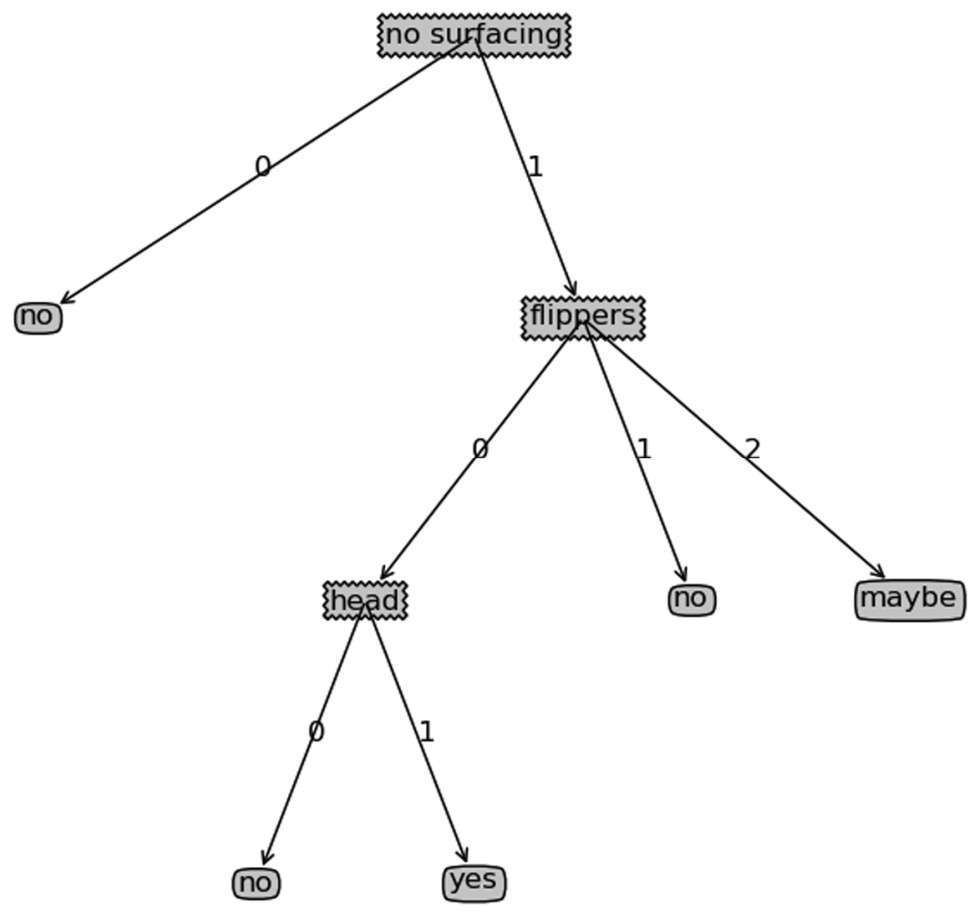

#### 3.2.1 Matplotlib注解

Matplotlib提供了一个非常有用的注解工具annotations, 它可以在数据图形上添加文本注解。

注解通常用于解释数据的内容。由于数据上面直接存在文本描述非常不美观，因此工具内嵌支持带箭头的划线工具，使得我们可以在其他恰当的地方指向数据位置，并在此处添加描述信息，解释数据内容。如图3-4所示，在坐标（0.2，0.1）的位置有一个点，我们将在对该点的描述信息放在（0.35，0.3）的位置，并用箭头指向数据点（0.2，0.1）。







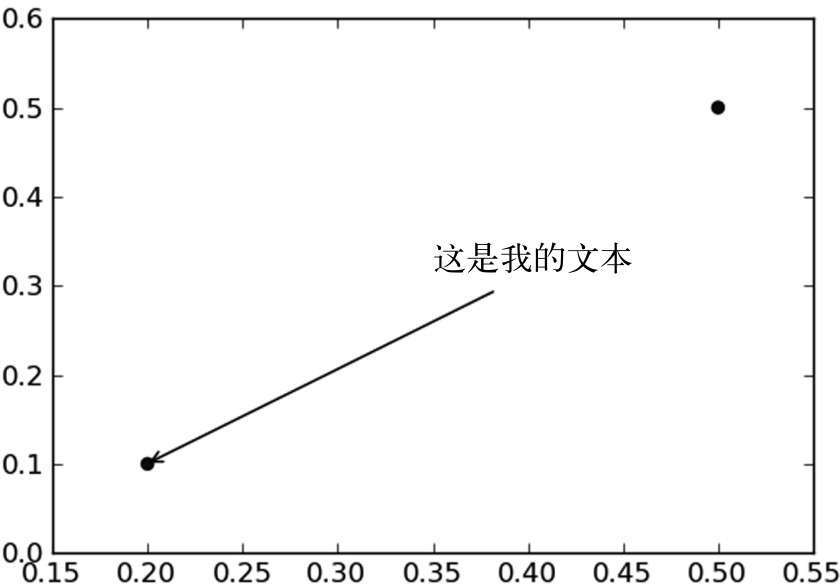



图3-4 Matplotlib注解示例

绘制还是图形化

为什么使用单词“绘制”（plot）？为什么在讨论如何在图形上显示数据的时候不使用单词”图形化“（graph）？这里存在一些语言上的差别，英语单词graph在某些学科中具有特定的含义，如在应用数学中，一系列由边连接在一起的对象或者节点成为图。节点间的任意联系都可以通过边来表示。在计算机科学中，图是一种数据结构，用于表示数学上的概念。还在汉语并不存在这些混淆的概念。这里就统一使用绘制树形图，

本书将使用Matplotlib的注解功能绘制树形图，它可以对文字着色并提供多种形状以供选择。而且我们还可以反转肩头，将它指向文本框而不是数据点。


$$程序清单3-5 使用文本注解绘制树节点$$




In [7]:
import matplotlib.pyplot as plt

# 定义描述树节点的常量，定义了文本框和箭头格式
decisionNode = dict(boxstyle = "sawtooth",fc = "0.8")
leafNode = dict(boxstyle="round4",fc = "0.8")
arrow_args = dict(arrowstyle="<-")

# 定义plotNode（）函数执行了实际的绘图功能，该函数需要一个绘图区，该区域由全局变量createPlot.ax1定义。
def plotNode(nodeText,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeText, xy = parentPt, xycoords = 'axes fraction',xytext = centerPt,textcoords="axes fraction",va = "center",ha = "center",bbox = nodeType,arrowprops = arrow_args)
# 定义createPlot（）函数，是这段代码的核心。
# 首先创建了一个新图形并清空绘图区，然后在绘图区上绘制两个代表不同类型的树节点，后面我们将用这两个节点绘制树形图。

def createPlot():
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
    plt.rcParams['font.sans-serif']=['SimHei']
    createPlot.ax1 = plt.subplot(111,frameon = False)
    plotNode('决策节点',(0.5, 0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点' ,(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()
    

这是第一个版本的createPlot()函数，与例子文件中的createPlot()函数有些不同，随着内容的深入，我们将逐步添加缺失的代码。代码定义了描述树节点格式的常量1。然后定义plotNode()函数执行了实际的绘图功能，该函数需要一个绘图区，该区域由全局变量createPlot.ax1定义。Python语言中所有的变量默认都是全局有效的，只要我们清楚知道当前代码的主要功能，并不会引入太大的麻烦。最后定义createPlot()函数，它是这段代码的核心。createPlot()函数首先创建了一个新图形并清空绘图区，然后在绘图区上绘制两个代表不同类型的树节点，后面我们将用这两个节点绘制树形图。

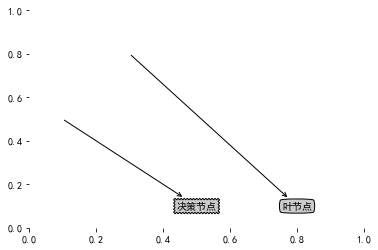

In [8]:

createPlot()


现在我们可以将前面学到的方法组合在一起，绘制一颗完整的树。最终的结果如图3-6所示，但是没有x轴和y轴标签。

#### 3.2.2 构造注解树

绘制一颗完整的树需要一些技巧。我们虽有x、y坐标，但是如何放置所有的树节点是个问题。我们必须知道有多少个叶节点。以便可以正确确定y轴的高度。这里我们定义两个新函数getNumLeafs () 和getTreeDepth(), 来获取叶节点的数目和树的层数，参见程序清单3-6，

$$ 程序清单3-6 获取叶节点的数目和树的层数 $$


In [10]:
def getNumLeafs(myTree):
    numLeafs = 0
#     第一个关键字是第一次划分数据集的类别标签，附带的数值表示子节点的取值。
    firstStr =list(myTree.keys())[0]
    secondDict = myTree[firstStr]
#     从第一个关键字出发，我们可以遍历整棵树的所有子节点。使用python提供的type（） 函数而已判断子节点是否为字典型
#    如果子节点是字典类型，则该节点也是一个判断节点。需要递归调用getNumLeafs（）函数。getNumleafs（）函数遍历整棵树，
# 累计叶子节点个数，并返回该数值。
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else:
            numLeafs+=1
    return numLeafs


# 第2个函数getTresDepth（）计算遍历过程中遇到判断节点的个数。该函数的终止条件是叶子节点，一旦到达叶子节点，
# 则从递归调用中返回，并将计算树深度的变量加一。

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 +getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

上述程序中的两个函数具有相同的结构，后面我们也将使用到这两个函数。这里使用的数据结构说明了如何在Python字典类型中存储树信息。第一个关键字是第一次划分数据集的类别标签，附带的数值表示子节点的取值。从第一个关键字出发，我们可以遍历整棵树的所有子节点。使用Python提供的type()函数可以判断子节点是否为字典类型1。如果子节点是字典类型，则该节点也是一个判断节点，需要递归调用getNumLeafs()函数。getNumLeafs()函数遍历整棵树，累计叶子节点的个数，并返回该数值。第2个函数getTreeDepth()计算遍历过程中遇到判断节点的个数。该函数的终止条件是叶子节点，一旦到达叶子节点，则从递归调用中返回，并将计算树深度的变量加一。为了节省大家的时间，函数retrieveTree输出预先存储的树信息，避免了每次测试代码时都要从数据中创建树的麻烦。





In [13]:
# 为了节省大家时间，函数retrieveTree 输出预先存储的树信息，避免了每次测试代码时都要从数据中创建树的麻烦

def  retrieveTree(i):
    listOfTrees = [{'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},{'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}]
    return listOfTrees[i]


#函数retrieve（） 主要用于测试，返回预定义的树结构。上述命令中调用getNumLeafs（）函数返回值为3，
# 等于树0的叶子节点数；调用getTreeDepths（）函数也能够正确返回数的层数



In [14]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [15]:
myTree = retrieveTree(0)

In [271]:
getNumLeafs(myTree)

3

In [272]:
getTreeDepth(myTree)

2


函数retrieveTree()主要用于测试，返回预定义的树结构。上述命令中调用getNumLeafs()函数返回值为3，等于树0的叶子节点数；调用getTreeDepths()函数也能够正确返回树的层数

现在我们可以将前面学到的方法组合在一起，绘制一颗完整的树。最终的结果如图3-6所示，但是没有x轴和y轴标签。

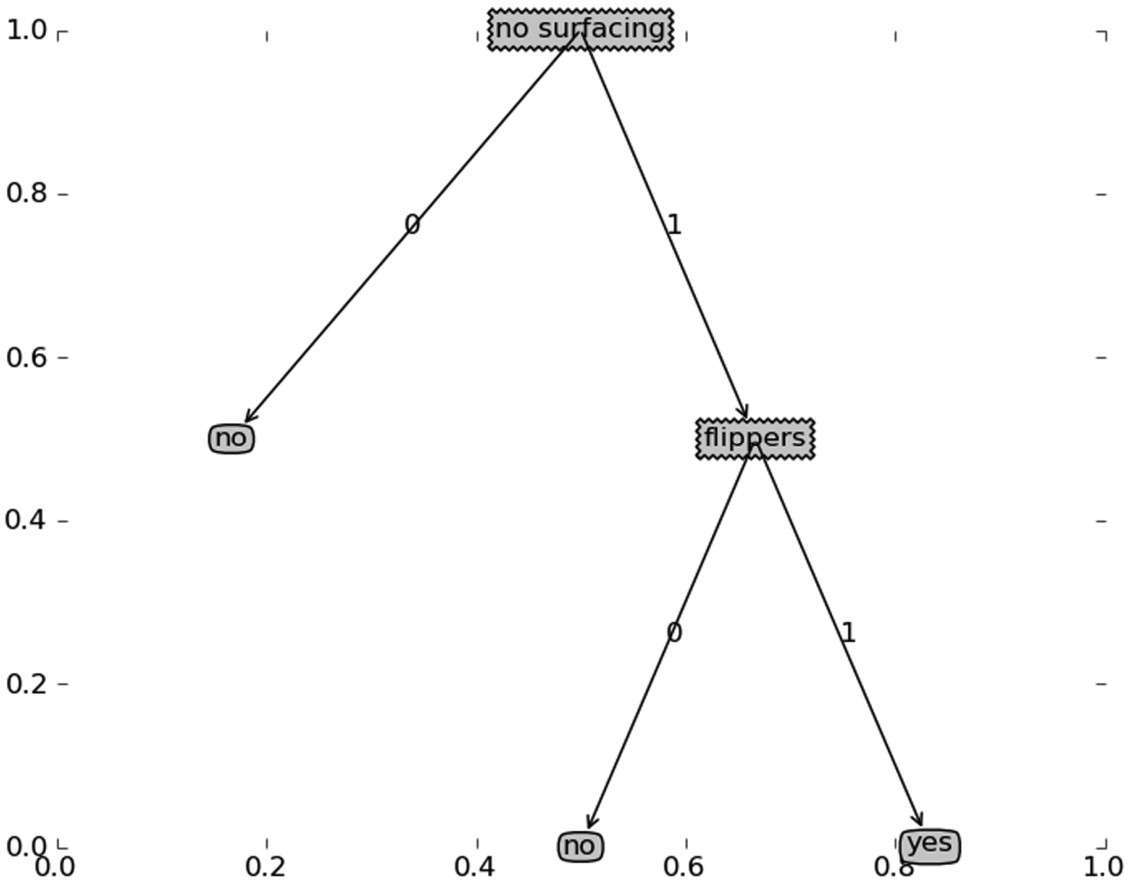
图3-6简单数据集绘制的树形图


$$程序清单3-7 plotTree函数$$

In [16]:
def plotMidText(cntrPt,parentPt,txtString):
#     在父子节点间填充文本信息
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree,parentPt,nodeTxt):
#     计算宽与高
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    

    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    
#     标记子节点属性
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
#     减少y偏移
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff =plotTree.yOff+1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
    axprops = dict(xticks = [],yticks = [])
    createPlot.ax1 = plt.subplot(111,frameon = False,**axprops)
    #     全局变量plotTree.totalW储存树的宽度
    plotTree.totalW = float(getNumLeafs(inTree))
    #     全局变量plotTree.totalD储存树的深度
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW;plotTree.yOff = 1.0;
    plotTree(inTree,(0.5,1.0),'')
    plt.show()
    

函数createPlot() 是我们使用的主函数，它调用了plotTree（），函数plotTree又依次调用了前面介绍的函数和plotMidText()。绘制树形图的很多工作都是在函数plotTree（）中完成的，函数plotTree（）首先计算树的宽和高，全局变量plotTree.totalW储存树的宽度，全局变量plotTree.totalD储存树的深度。我们使用这两个变量计算树节点的摆放位置，这样可以将树绘制在水平方向和垂直定向的中心位置，主要的计算原则是将它放在所有叶子节点的中间，而不仅仅是它子节点的中间。同时我们使用两个全局变量plotTree.xOff 和plotTree.yOff追踪已经绘制的节点位置，以及放置下一个节点的恰当位置。另一个需要说明的问题是，绘制图形的x轴有效范围是0.0到1.0，y轴有效范围也是0.0～1.0.为了方便起见，图3-6 给出具体坐标值，实际输出的图形中并没有x，y坐标。通过计算树包含的所有叶子节点数，划分图形的宽度，从而计算得到当前节点的中心位置，也就是说，我们按照叶子节点的数目将x轴划分为若干部分。按照图形比例绘制树形图的最大好处是无需关心实际输出图形的大小，一旦图形大小发生了变化，函数会自动按照图形大小重新绘制。如果以像素为单位绘制图形，则缩放图形就不是一件简单的工作。

接着，绘出子节点具有的特征值，或者沿此分支向下的数据实例必须具有的特征值。使用函数plotMidText（）计算父节点和子节点的中间位置，并在此处添加简单的文本标签信息。

然后按比例减少全局变量plotTree.yOff,并标注此处将要绘制子节点，这些节点既可以是叶子节点也可以是判断节点，此处需要只保存绘制图形的轨迹，因为我们是自顶向下绘制图形，因此需要依次递减y坐标值，而不是递增y坐标值。然后程序采用函数getNumLeafs（）和getTreeDepth（）以相同的方式递归遍历整棵树，如果节点是叶子节点则在图形上画出叶子节点，如果不是叶子节点则递归调用plotTree()函数。在绘制了所有的子节点之后，增加全局变量Y的偏移。程序清单3-7的最后一个函数是createPlot（），它创建绘图区，计算树形图的全局尺寸，并调用递归函数plotTree（）



In [275]:
myTree = retrieveTree(0)


In [276]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

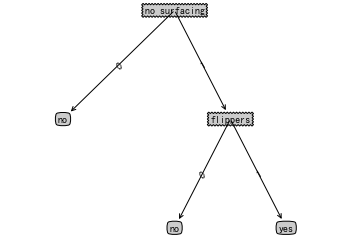

In [277]:
createPlot(myTree)

In [278]:
myTree['no surfacing'][3]='maybe'

In [279]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

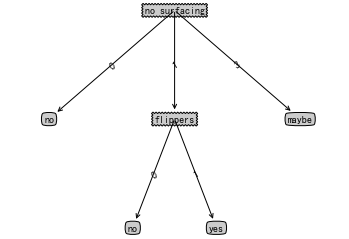

In [280]:
createPlot(myTree)

到目前为止我们已经学习了如何构造决策树以及绘制树形图形的方法，下节我们将实际使用这些方法，并从数据和算法中得到某新知识。

### 3.3 测试和存储分类器

本书以及部分主要讲解机器学习的分类算法，而目前为止，贲张学习的主要内容是如何从原始数据集中创建决策树，并使用python函数库绘制树形图，方便我们了解数据的真实含义，下面我们将把重点转移到如何利用决策树执行数据分类上。

本节我们将使用决策树构建分类器，并介绍实际应用中如何存储分类器。下一节我们将在真实数据上使用决策树分类算法，验证它是否可以正确预测出患者应该使用的隐形眼镜类型。



#### 3.3.1 测试算法：使用决策树执行分类

依靠训练数据构造了决策树之后，我们可以将它用于实际数据的分类。在执行数据分类时，需要使用决策树以及用于构造决策树的标签向量。然后，程序比较测试数据与决策树上的数值，递归执行该过程知道进入叶子节点；最后将测试数据定义为叶子节点所属的类型。







$$ 3-8 使用决策树的分类函数 $$


In [281]:
from importlib import reload
import importlib
import trees
importlib.reload(trees)

def classify(inputTree,featLabels,testVec):
    
    firstStr = (list(inputTree.keys()))[0]
    secondDict = inputTree[firstStr]
    #     使用index方法查找当前列表中第一个匹配firstStr变量的元素
    featIndex = featLabels.index(firstStr)
#     递归遍历整棵树，比较testVec变量中的值与树节点的值。如果到达叶子节点，则返回当前节点的分类标签
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ =='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else: classLabel = secondDict[key]
    return classLabel

    

清单3-8定义的函数也是一个递归函数，在存储带有特征的数据会面临一个问题：程序无法确定特征在数据集中的位置，例如前面例子的第一个用于划分数据集的特征是no surfacing属性，但是在实际数据集中该属性存储在哪个位置？是第一个属性还是第二个属性？特征标签列表将帮助程序处理这个问题。使用index方法查找当前列表中第一个匹配firstStr变量的元素1。然后代码递归遍历整棵树，比较testVec变量中的值与树节点的值，如果到达叶子节点，则返回当前节点的分类标签。

In [282]:

myDat,labels = createDataSet()
labels

['no surfacing', 'flippers']

In [283]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [284]:
classify(myTree,labels,[1,0])

'no'

In [285]:
classify(myTree,labels,[1,1])

'yes'

与图3-6比较上述输出结果。第一节点名为no surfacing，它有两个子节点：一个是名字为0的叶子节点，类标签为no；另一个是名为flippers的判断节点，此处进入递归调用，flippers节点有两个子节点。以前绘制的树形图和此处代表树的数据结构完全相同。
现在我们已经创建了使用决策树的分类器，但是每次使用分类器时，必须重新构造决策树，下一节我们将介绍如何在硬盘上存储决策树分类器。


#### 3.3.2 使用算法：决策树的存储

构造决策树是很消耗时间的任务，即使处理很小的数据集，如前面的样本数据，也要花费几秒的时间，如果数据集很大，将会耗费很多计算时间。然而用创建好的决策树解决分类问题，则可以很快完成。因此，为了节省计算时间，最好能够在每次执分类时调用已经构造好的决策树。为了解决这个问题，需要使用python模块pickle序列化对象，参见程序清单3-9.序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。任何对象都可以执行序列化操作，字典对象也不例外。




$$程序清单3-9使用pickle 模块存储决策树$$


In [286]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb+') 
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)


In [287]:
storeTree(myTree,'classifierStorage.txt')

In [288]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

通过上面的代码我们可以将分类器存储在硬盘上而不用米兹对数据的背时重新学习一遍。这也是决策树的优点之一。像第2章介绍了k-近邻算法就无法持久划分类器。我们可以预先提炼并存储数据集中包含的知识信息。下节我们将使用这些工具处理隐形眼镜数据集。


### 3.4 示例：使用决策树测隐形眼镜类型



本节我们将通过一个例子讲解决策树如何预测患者需要佩戴的隐形眼镜类型。使用小数据集，我们就可以利用决策树学到很多知识：眼科医生是如何判断患者需要佩戴的镜片类型的。一旦理解了决策树的工作原理，我们设置也可以帮助人们判断需要佩戴的镜片类型。



示例：使用决策树预测隐形眼镜类型

（1）收集数据：提供的文本文件。

（2）准备数据：解析tab键分隔的数据行

（3）分析数据：快速检查数据，确保正确地解析数据内容，使用createPlot()函数绘制最终的树形图。

（4）训练算法：使用3.1节的createTree（）函数。

（5）测试算法：编写测试函数验证决策树可以正确分类给定的数据实例。

（6）使用算法：存储树的数据结构，以便下次使用时无需重新构造树。

隐形眼镜数据集￼是非常著名的数据集，它包含很多患者眼部状况的观察条件以及医生推荐的隐形眼镜类型。隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。数据来源于UCI数据库，为了更容易显示数据，本书对数据做了简单的更改，数据存储在源代码下载路径的文本文件中。





In [289]:
fr = open('lenses.txt')

In [290]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = createTree(lenses,lensesLabels)
lensesTree

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'presbyopic': 'no lenses',
        'pre': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}},
    'no': {'age': {'presbyopic': {'prescript': {'hyper': 'soft',
        'myope': 'no lenses'}},
      'pre': 'soft',
      'young': 'soft'}}}}}}

采用文本方式很难分辨出决策树的模样，最后一行命令调用createPlot()函数绘制了如图3-8所示的树形图。沿着决策树的不同分支，我们可以得到不同患者需要佩戴的隐形眼镜类型。从图3-8上我们也可以发现，医生最多需要问四个问题就能确定患者需要佩戴哪种类型的隐形眼镜。

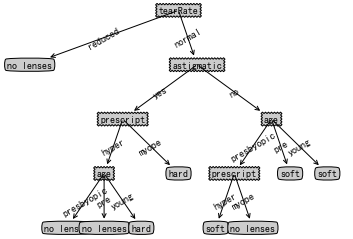

In [291]:
createPlot(lensesTree)

图3-8 所示的决策树非常好地匹配了实验数据，然而这些匹配可选项太多了。我们将这种问题称之为过度匹配（overfiting）。为了减少过度匹配问题，我们可以裁剪决策树，去掉一些不必要的叶子节点。如果叶子节点只能增加少许信息，则可以删除该节点。如果叶子节点只能增加少许信息，则可以删除该节点，将它并入到其他叶子节点中。第9章将进一步讨论这个问题

本章使用的算法称为ID3它是一个好的算法但不完美，ID3算法无法直接处理数值型数据，尽管我们可以通过量化的方法将数值型数据转化为标称型数值。但是如果存在太多的特征划分，ID3算法仍然会面临其他问题。

### 3.5 本章小结

决策树分类器就像带有终止块的流程图，终止块表示分类结果。开始处理数据集时，我们首先需要测量集合中数据的不一致性，也就是熵，然后寻找最优方案划分数据集，知道数据集中的所有数据属于同一分类。ID3算法可以用于划分标称型数据集。构建决策树时，我们同茶馆采用递归的方法将数据集转化为决策树。一般我们并不构造新的数据结构，而是使用python语言内嵌的数据结构字典存储树节点信息。



使用matplotlib的注解功能，我们可以接将存储的树结构转化为容易理解的图形。Python语言的pickle模块可用于存储决策树的结构。隐形眼镜的例子表明决策树可能会产生过多的数据集划分，从而产生过度匹配数据的问题。我们可以通过剪裁决策树，合并相邻的无法生产大量信息增益的叶节点，消除过度匹配问题。

还有其他的决策树的构造算法，最流行的是C4.5 (C4.5算法是由Ross Quinlan开发的用于产生决策树的算法。该算法是对Ross Quinlan之前开发的ID3算法的一个扩展。C4.5算法产生的决策树可以被用作分类目的，因此该算法也可以用于统计分类。)和CART（CART(Classification AndRegressionTree)算法采用一种二分递归分割的技术，将当前 的样本集分为两个子样本集，使得生成的url子节点都有两个分支。因此，CART算法生成的决策树是结构简洁的二叉树。)

本书第2、3章讨论的是结果确定的分类算法，数据实例最终回被明确划分到某个分类中。下一章我们讨论的分类算法将不能完全确定数据应该划分到某个分类，或者只能给出数据实例属于给定分类的概率。

